#👩‍💻 Welcome to the Pandas Practice Notebook!


**🧠 Goal:**

In this notebook, You will practice essential data analysis skills using Pandas.
You will work on a real-world dataset and go through a series of challenges that build your understanding step by step.



**📁 About the Dataset:**

The data is stored in a file called `dataset.csv`, and it includes the following columns:

- Name: Person’s name

- Country: Country name

- Age: Age of the person

- Salary: Monthly salary

- Purchased: Whether the person made a purchase or not (Yes/No)

**🧩 What You Will Do:**

You will complete 8 mini challenges, each focused on a key concept:

* Load & Explore – Load the dataset and view its basic structure

* Remove Duplicates – Find and remove duplicate rows

* Drop Columns – Drop unnecessary columns like name

* Detect Missing Values – Identify missing values in the dataset

* Fill Missing Values – Fill missing values using mean and mode

* Fix Wrong Age Values – Remove rows with negative age

* Encode Categorical Data – Convert text to numbers using label encoding

* Scale Numerical Features – Apply scaling to age and salary columns

# Challenge 1: Load and Explore the Dataset

🌟 Task: Import pandas, load the dataset, and explore its basic structure.

📋 Description:
- Import the pandas library.
- Load the dataset using .read_csv().
- Display the first few rows using .head().
- Print the shape of the dataset (rows, columns).
- Show the column data types and non-null counts using .info().

📁 File: dataset.csv

In [1]:
import pandas as pd

data = pd.read_csv("/content/dataset.csv")
data.head()


,name,Country,Age,Salary,Purchased
0,Olivia Johnson,France,-44,72000.0,No
1,Liam Smith,Spain,27,48000.0,Yes
2,Emma Brown,Germany,30,54000.0,No
3,Noah Williams,Spain,38,61000.0,No
4,Ava Jones,Germany,40,NaN,Yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       18 non-null     object 
 1   Country    17 non-null     object 
 2   Age        18 non-null     int64  
 3   Salary     16 non-null     float64
 4   Purchased  18 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 852.0+ bytes


In [3]:
data.shape[0]

18

#Challenge 2: Remove Duplicates

🌟 Task: Find and remove duplicate rows.

📊 Output: Dataset without duplicates

In [4]:
duplicates = data[data.duplicated()]
print(duplicates)


          name  Country  Age   Salary Purchased
16  Liam Smith    Spain   27  48000.0       Yes
17  Emma Brown  Germany   30  54000.0        No


In [5]:
data = data.drop_duplicates()

In [6]:
data.shape[0]

16

# Challenge 3: Drop Columns


🌟 Task: Drop name column.

In [7]:
data = data.drop("name", axis=1)
data.head()


,Country,Age,Salary,Purchased
0,France,-44,72000.0,No
1,Spain,27,48000.0,Yes
2,Germany,30,54000.0,No
3,Spain,38,61000.0,No
4,Germany,40,NaN,Yes


# Challenge 4: Detect Missing Values


🌟 Task: Find how many missing values are in each column.


In [8]:
data.isnull().sum()


,0
Country,1
Age,0
Salary,2
Purchased,0


#Challenge 5: Fill Missing Values

🌟 Task: Fill missing values in 'salary' and 'country'.

📋 Description:
- Fill missing 'salary' values using the column's mean.
- Fill missing 'country' values using the column's mode.

🌟 Hint!: you can use .fillna() method

In [9]:
data['Salary'] = data['Salary'] = data["Salary"].fillna(data["Salary"].mean())


In [10]:
data['Country'].mode()

,Country
0,France


In [11]:
data['Country']= data['Country'].fillna(data['Country'].mode()[0])

# Challenge 6: Detect Wrong Age Values


🌟 Task: drop all rows where the age is negative.

📋 Description:
- first display all rows where age is negative.
- then drop that rows.
- Remember: df[df["column"] > 0], and df.drop() might be useful 😉



In [12]:
data[data['Age']<0]


,Country,Age,Salary,Purchased
0,France,-44,72000.0,No


In [13]:
data = data[data["Age"] >= 0]

In [ ]:
data.head()

# Challenge 7: Encode Categorical Columns


🌟 Task: Encode the 'country' and 'Purchased' columns using label encoding.

📋 Description:
- Use .replace() or sklearn's LabelEncoder to convert text to numbers.
- For example: "France" → 0, "Spain" → 1, etc.
- For example: "No"  → 0, "Yes" → 1.



In [15]:
avg_salary_by_country = data.groupby("Country")["Salary"].mean()
avg_salary_by_country



,Salary
Country,
France,67333.333333
Germany,70171.428571
Spain,53000.000000


In [16]:
purchase_rate = data.groupby("Country")["Purchased"].value_counts(normalize=True).unstack()
purchase_rate


Purchased,No,Yes
Country,,
France,NaN,1.00
Germany,0.60,0.40
Spain,0.75,0.25


In [17]:
import plotly.express as px

fig = px.histogram(data, x='Country', title='Country Distribution Histogram',color_discrete_sequence=['#ffbeb2'])

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',

    font=dict(color='white'),

    xaxis=dict(showgrid=False, ),
    yaxis=dict(gridcolor='gray')
)
fig.show()


In [18]:
sorted_data = data.sort_values(by="Salary", ascending=False)
sorted_data

,Country,Age,Salary,Purchased
14,Germany,33,84000.000000,No
8,Germany,50,83000.000000,No
7,France,48,79000.000000,Yes
13,France,41,77000.000000,Yes
9,France,37,67000.000000,Yes
15,France,39,66000.000000,Yes
4,Germany,40,64928.571429,Yes
10,Germany,30,64928.571429,Yes
3,Spain,38,61000.000000,No
5,France,35,58000.000000,Yes


In [19]:
sorted_data1 = data.sort_values(by="Age", ascending=True)
sorted_data1


,Country,Age,Salary,Purchased
12,Spain,24,51000.000000,No
1,Spain,27,48000.000000,Yes
10,Germany,30,64928.571429,Yes
2,Germany,30,54000.000000,No
14,Germany,33,84000.000000,No
6,Spain,34,52000.000000,No
11,France,35,57000.000000,Yes
5,France,35,58000.000000,Yes
9,France,37,67000.000000,Yes
3,Spain,38,61000.000000,No


In [20]:
def classify_age(age):
    if age < 30:
        return "Young"
    elif age < 50:
        return "Adult"
    else:
        return "Senior"

data["AgeCategory"] = data["Age"].apply(classify_age)

In [21]:
data.head()

,Country,Age,Salary,Purchased,AgeCategory
1,Spain,27,48000.000000,Yes,Young
2,Germany,30,54000.000000,No,Adult
3,Spain,38,61000.000000,No,Adult
4,Germany,40,64928.571429,Yes,Adult
5,France,35,58000.000000,Yes,Adult


In [22]:
purple_shades = ['#E0BBE4', '#957DAD', '#D291BC']

age_counts = data['AgeCategory'].value_counts().reset_index()
age_counts.columns = ['AgeCategory', 'Count']

fig = px.pie(age_counts, values='Count', names='AgeCategory',
             title='Age Category Distribution',
             color_discrete_sequence=purple_shades,
             )
fig.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
le_purchased = LabelEncoder()

data['Country'] = le_country.fit_transform(data['Country'])
data['Purchased'] = le_purchased.fit_transform(data['Purchased'])

In [24]:
data.head()

,Country,Age,Salary,Purchased,AgeCategory
1,2,27,48000.000000,1,Young
2,1,30,54000.000000,0,Adult
3,2,38,61000.000000,0,Adult
4,1,40,64928.571429,1,Adult
5,0,35,58000.000000,1,Adult


# Challenge 8: Scale Numerical Features


🌟 Task: Apply StandardScaler to numerical columns.

📋 Description:
- Use sklearn.preprocessing.StandardScaler
- Apply it to columns like 'salary' and 'age'
- Replace original values with the scaled ones

🧠 Tip: Don't scale categorical columns!

In [25]:
from sklearn.preprocessing import StandardScaler

scaled_data = data.copy()

numeric_cols = ['Salary', 'Age']
scaler = StandardScaler()
scaled_data[numeric_cols] = scaler.fit_transform(scaled_data[numeric_cols])
scaled_data.head()



,Country,Age,Salary,Purchased,AgeCategory
1,2,-1.320700,-1.451001,1,Young
2,1,-0.883703,-0.921990,0,Adult
3,2,0.281620,-0.304811,0,Adult
4,1,0.572951,0.041565,1,Adult
5,0,-0.155376,-0.569316,1,Adult


# **The Final DataSet After Cleaning Should Look Like This:**



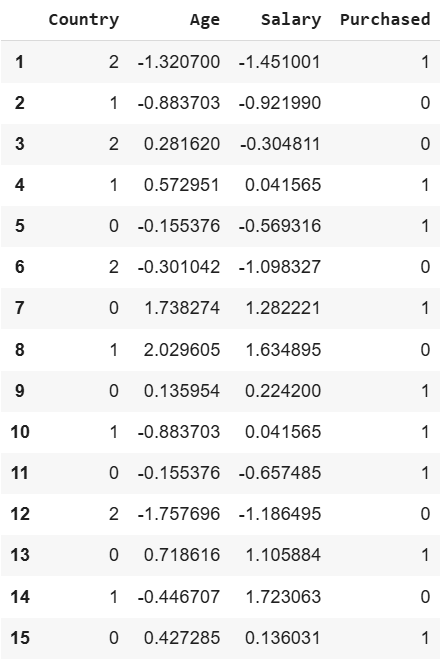